<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9F%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B5_%D0%BF%D0%BE%D1%80%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Простое пороговое преобразование</b></h1>

В этом уроке научимся выделять предметы на изображении путём подбора порогового значения.




In [1]:
# import the necessary packages
# импортируем необходимые модули
import cv2
from google.colab.patches import cv2_imshow

Загрузка файлов

In [2]:
!wget http://dataudt.ru/datasets/cv/Lesson_18.Thresholding_simple.zip
!unzip Lesson_18.Thresholding_simple.zip
%cd /content/Lesson_18.Thresholding_simple

--2022-02-01 18:30:45--  http://dataudt.ru/datasets/cv/Lesson_18.Thresholding_simple.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 601169 (587K) [application/zip]
Saving to: ‘Lesson_18.Thresholding_simple.zip’

Lesson_18.Threshold 100%[===================>] 587.08K  1.02MB/s    in 0.6s    

2022-02-01 18:30:46 (1.02 MB/s) - ‘Lesson_18.Thresholding_simple.zip’ saved [601169/601169]

Archive:  Lesson_18.Thresholding_simple.zip
  inflating: Lesson_18.Thresholding_simple/coins_01.png  
  inflating: Lesson_18.Thresholding_simple/coins_02.png  
  inflating: Lesson_18.Thresholding_simple/Thresholding_simple.py  
/content/Lesson_18.Thresholding_simple


In [7]:
# construct the argument parser and parse the arguments
# создадим парсер и укажем аргументы
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())
# пока мы используем Jupyter Notebooks мы можем заменить наш парсер
# явными аргументами и значениями
args = {
	"image": "/content/Lesson_18.Thresholding_simple/coins_01.png",

}

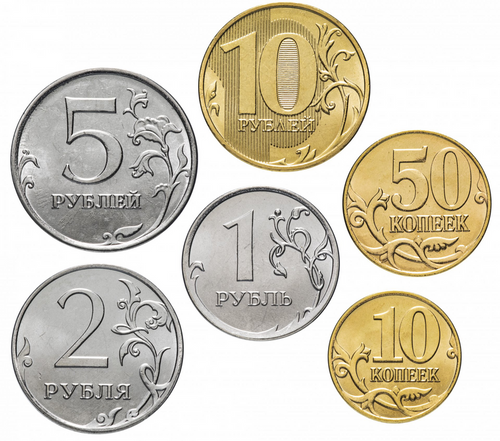

Image


In [8]:
# load the image, convert it to grayscale, and blur it slightly
# загружаем изображение, конвертируем его 
# в градации серого и слегка размываем
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
cv2_imshow(image)
print("Image")

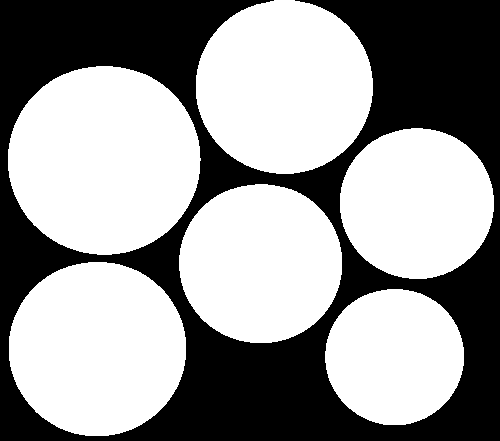

Threshold Binary Inverse


In [9]:
# apply basic thresholding -- the first parameter is the image
# we want to threshold, the second value is is our threshold
# check; if a pixel value is greater than our threshold (in this
# case, 200), we set it to be BLACK, otherwise it is WHITE.
# применим базовое пороговое значение - первый параметр 
# это изображение, которое мы хотим преобразовать,
# второе значение - это наша проверка порога; 
# если значение пикселя больше нашего порога (в данном случае 209),
# мы устанавливаем его ЧЕРНЫМ, в противном случае - БЕЛЫМ.
(T, threshInv) = cv2.threshold(blurred, 245, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv)
print("Threshold Binary Inverse")
 

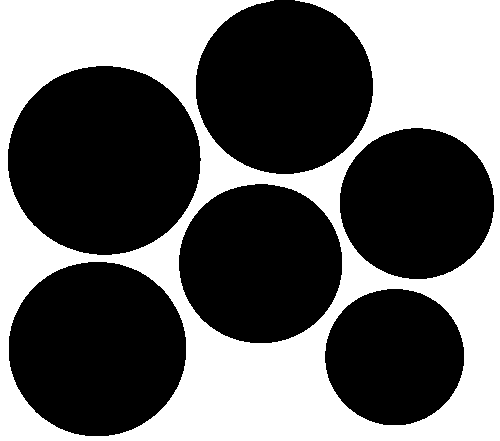

Threshold Binary


In [10]:
# using normal thresholding (rather than inverse thresholding),
# we can change the last argument in the function to make the coins
# black rather than white.
# используя обычное пороговое значение (а не обратное 
# пороговое значение), мы можем изменить последний аргумент
# в функции, чтобы монеты стали черными, а не белыми.
(T, thresh) = cv2.threshold(blurred, 245, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
print("Threshold Binary")

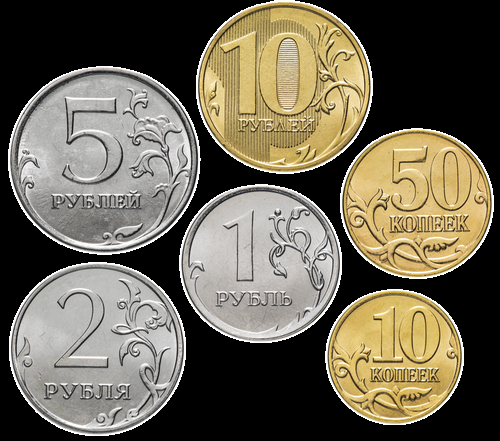

Output


In [11]:
# finally, we can visualize only the masked regions in the image
# наконец, мы можем визуализировать только 
# выделенные области изображения
cv2_imshow(cv2.bitwise_and(image, image, mask=threshInv))
print("Output")